# Introduction to MulensModel

How to create and plot a model and then add some data and fit for the source and blend fluxes.

This example shows OGLE-2003-BLG-235/MOA-2003-BLG-53, the first microlensing planets. See Bond et al. 2004 

In [1]:
# Import basic packages
import MulensModel
import matplotlib.pyplot as pl # MulensModel uses matplotlib for plotting.

In [2]:
# Define a point lens model:

my_pspl_model = MulensModel.Model(t_0=2452848.06, u_0=0.133, t_E=61.5)

# Or a model with 2-bodies:

my_1S2L_model = MulensModel.Model(
    t_0=2452848.06, u_0=0.133, t_E=61.5, rho=0.00096, q=0.0039, s=1.120, 
    alpha=43.8)

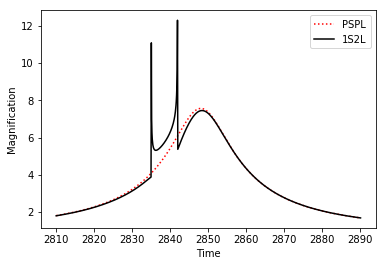

In [3]:
# Plot those models:
my_pspl_model.plot_magnification(
    t_range=[2452810, 2452890], subtract_2450000=True, color='red', 
    linestyle=':', label='PSPL')
my_1S2L_model.plot_magnification(
    t_range=[2452810, 2452890], subtract_2450000=True, color='black', 
    label='1S2L')
pl.legend(loc='best')
pl.show()

In [4]:
# Suppose you also had some data you want to import:

OGLE_data = MulensModel.MulensData(
    file_name='../data/OB03235/OB03235_OGLE.tbl.txt', comments=['\\','|'])

MOA_data = MulensModel.MulensData(
    file_name='../data/OB03235/OB03235_MOA.tbl.txt', phot_fmt='flux', 
    comments=['\\','|'])

/Users/jyee/MulensModel/source/MulensModel/utils.py:52: RuntimeWarning: invalid value encountered in log10
  mag = MAG_ZEROPOINT - 2.5 * np.log10(flux)


/Users/jyee/MulensModel/source/MulensModel/utils.py:52: RuntimeWarning: invalid value encountered in log10
  mag = MAG_ZEROPOINT - 2.5 * np.log10(flux)


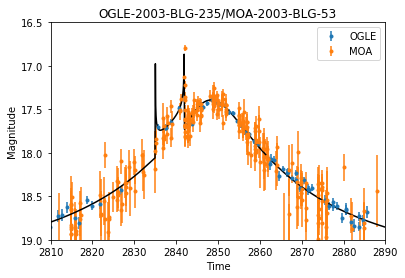

In [5]:
# Now suppose you wanted to combine the two together:
my_event = MulensModel.Event(
    datasets=[OGLE_data, MOA_data], model=my_1S2L_model)

# And you wanted to plot the result:
my_event.plot_model(
    t_range=[2452810,2452890], subtract_2450000=True, color='black')
my_event.plot_data(subtract_2450000=True, label_list=['OGLE','MOA'])
# MulensModel automatically fits for the source and blend flux for the  
# given model.

# Customize the output
pl.legend(loc='best')
pl.title('OGLE-2003-BLG-235/MOA-2003-BLG-53')
pl.ylim(19., 16.5)
pl.xlim(2810,2890)
pl.show()

In [6]:
# If you want to see how good the fit is, output the chi2:
print('Chi2 of the fit: {0:8.2f}'.format(my_event.get_chi2()))

Chi2 of the fit:  2194.16


If you want to optimize the chi2, we leave it up to you to determine the best method for doing this.